In [1]:
import matplotlib.pyplot as plt

from LMCE.data_prep import prepare_data
from LMCE.residual_calculation import indi_residuals, residual

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times']

In [2]:
testing_data_paths = ["./data/data_clean/63.npy"]

/Users/tupryk/opt/miniconda3/envs/robocup/lib/python3.10/site-packages/cvxpy/problems/problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


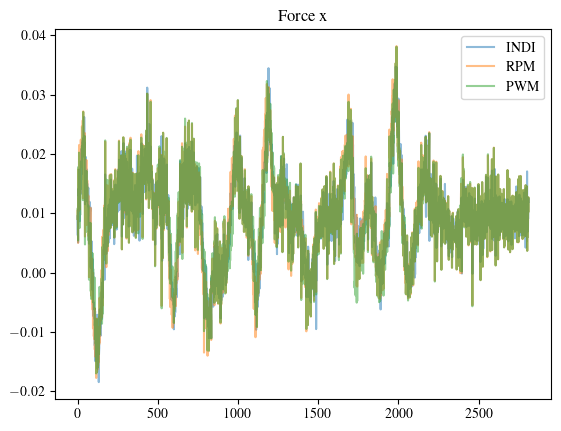

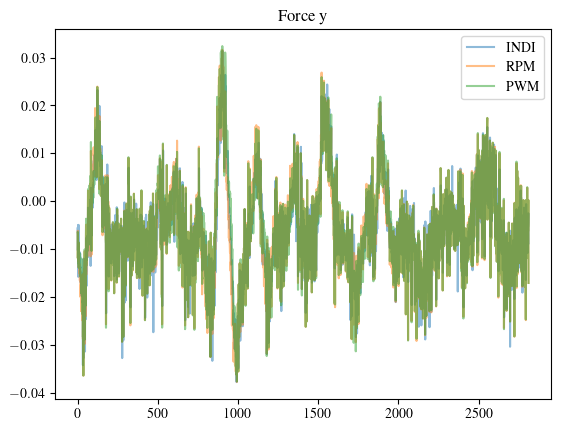

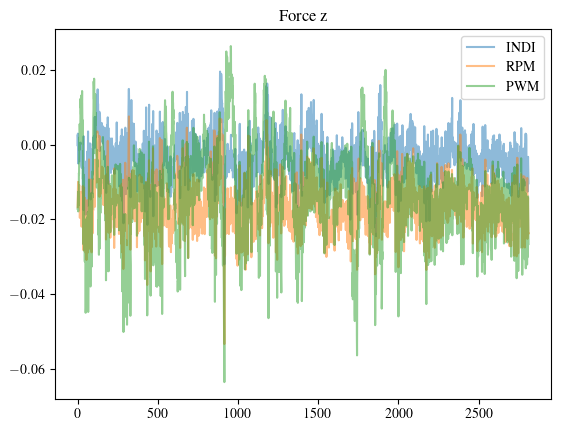

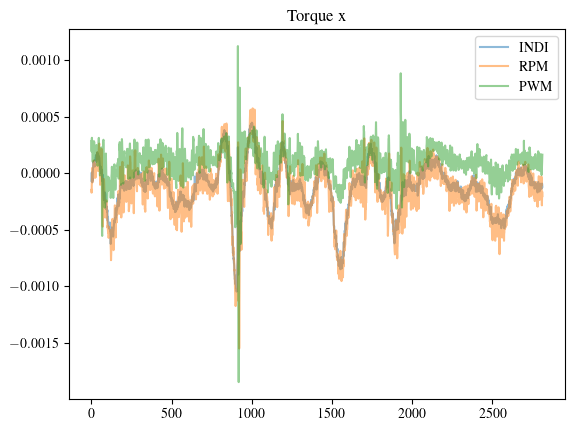

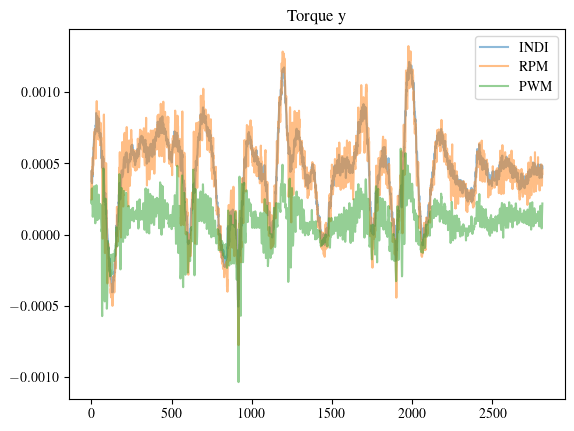

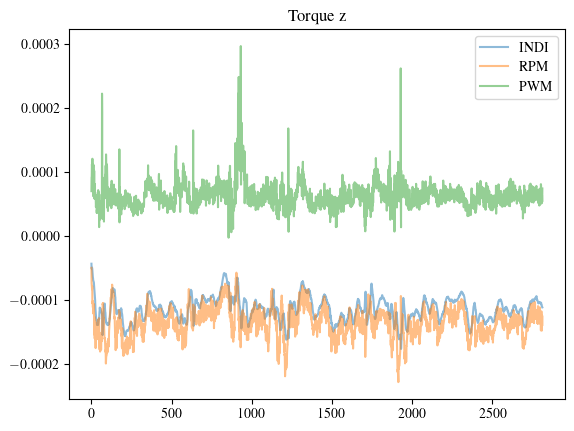

In [3]:
make_smooth = False
indi_residual_func = lambda data: indi_residuals(data, make_smooth=make_smooth)
residual_func = lambda data: residual(data, use_rpm=False, make_smooth=make_smooth)
residual_func_rpm = lambda data: residual(data, use_rpm=True, make_smooth=make_smooth)

_, indi = prepare_data(
    testing_data_paths,
    shuffle_data=False,
    residual_func=indi_residual_func
)
_, residuals_rpm = prepare_data(
    testing_data_paths,
    shuffle_data=False,
    residual_func=residual_func_rpm
)
_, residuals = prepare_data(
    testing_data_paths,
    shuffle_data=False,
    residual_func=residual_func
)

dims = ['x', 'y', 'z']
force_type = ["Force", "Torque"]
for i in range(6):
    fig, ax = plt.subplots()
    ax.set_title(f"{force_type[i//3]} {dims[i%3]}")
    ax.plot(indi[:, i], label="INDI", alpha=.5)
    ax.plot(residuals_rpm[:, i], label="RPM", alpha=.5)
    ax.plot(residuals[:, i], label="PWM", alpha=.5)
    ax.legend()

    plt.draw()
    plt.show()